In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving haberman.csv to haberman.csv


In [5]:
import io
df = pd.read_csv(io.BytesIO(uploaded['haberman.csv']), header=None)

In [6]:
df

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [8]:
values = df.values
X, y = values[:, :-1], values[:, -1]

In [11]:
n_rows = X.shape[0]
n_cols = X.shape[1]
classes = np.unique(y)
n_classes = len(classes)

In [12]:
print('N Examples: %d' % n_rows)
print('N Inputs: %d' % n_cols)
print('N Classes: %d' % n_classes)
print('Classes: %s' % classes)

N Examples: 306
N Inputs: 3
N Classes: 2
Classes: [1 2]


In [13]:
# class breakdown
breakdown = ''
for c in classes:
	total = len(y[y == c])
	ratio = (total / float(len(y))) * 100
	print(' - Class %s: %d (%.5f%%)' % (str(c), total, ratio))

 - Class 1: 225 (73.52941%)
 - Class 2: 81 (26.47059%)


In [16]:
df.columns=['Var1','Var2','Var3','Target']

In [18]:
mncls= df.loc[df.Target==2]

In [19]:
mncls

,Var1,Var2,Var3,Target
7,34,59,0,2
8,34,66,9,2
24,38,69,21,2
34,39,66,0,2
43,41,60,23,2
...,...,...,...,...
286,70,58,4,2
293,72,63,0,2
299,74,65,3,2
304,78,65,1,2


In [20]:
from sklearn.mixture import GaussianMixture as GMM
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import rcParams
rcParams['figure.figsize'] = 16, 8

In [22]:
embeddings=mncls[['Var1','Var2','Var3']]

In [36]:
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]
n_clusters=np.arange(2, 50)
bics=[]
bics_err=[]
iterations=20
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GMM(n, n_init=2).fit(embeddings)        
        tmp_bic.append(gmm.bic(embeddings))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

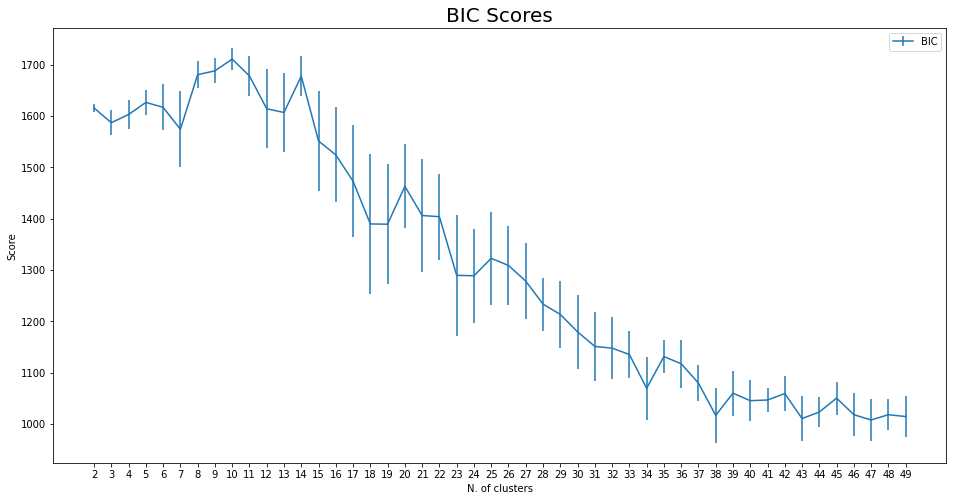

In [37]:
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()

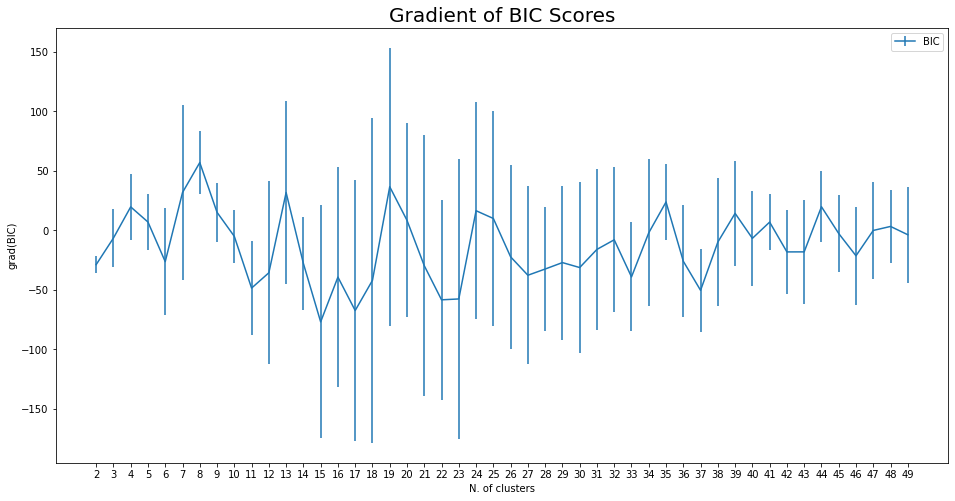

In [38]:

plt.errorbar(n_clusters, np.gradient(bics), yerr=bics_err, label='BIC')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("grad(BIC)")
plt.legend()

Text(0, 0.5, 'Score')

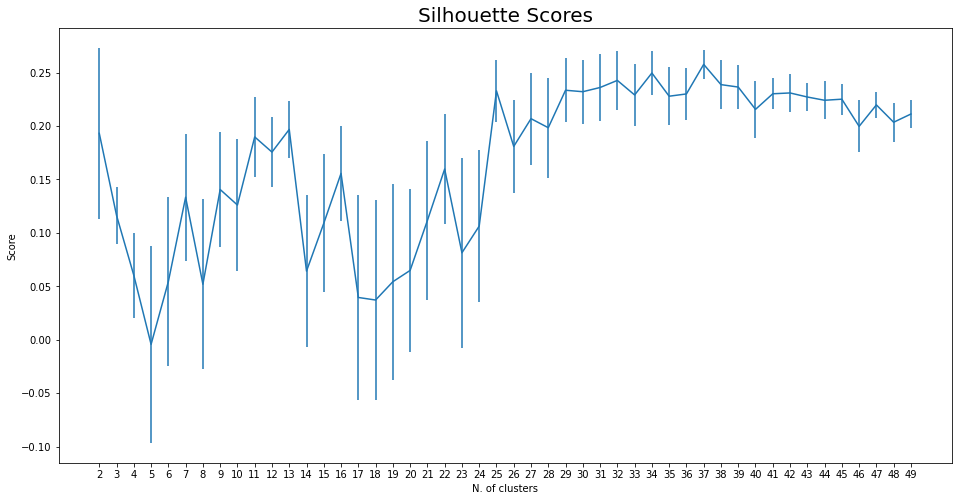

In [39]:
n_clusters=np.arange(2, 50)
sils=[]
sils_err=[]
iterations=20
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GMM(n, n_init=2).fit(embeddings) 
        labels=gmm.predict(embeddings)
        sil=metrics.silhouette_score(embeddings, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

In [41]:
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
    plt.title("GMM with %d components"%len(gmm.means_), fontsize=(20))
    plt.xlabel("U.A.")
    plt.ylabel("U.A.")

In [88]:
gmm=GMM(2).fit(embeddings) 

In [45]:
gmm?

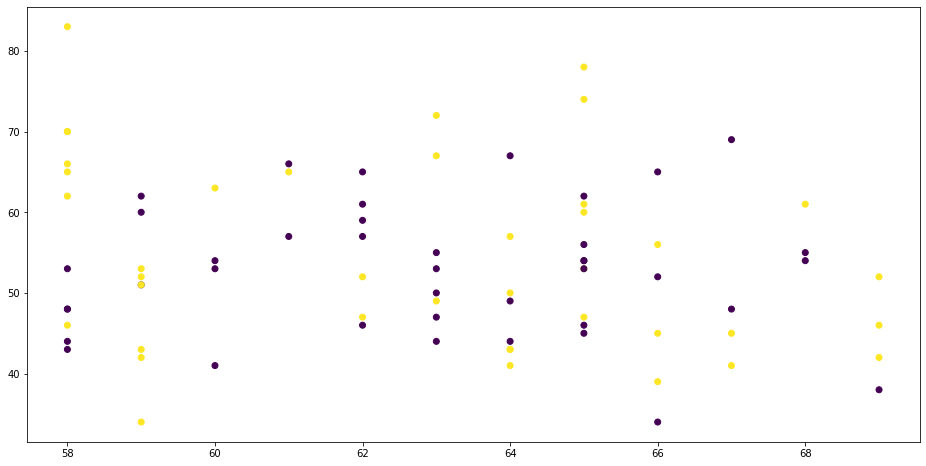

In [91]:
labels= gmm.predict(embeddings)
ax= plt.gca()
ax.scatter(embeddings.Var2, embeddings.Var1, c= labels, cmap= 'viridis')


In [92]:
mean_vectors=gmm.means_

In [93]:
cov_matrices=gmm.covariances_

In [101]:
inv_cov_matrices= gmm.precisions_

In [94]:
priors= gmm.weights_

In [95]:
priors

array([0.54844999, 0.45155001])

In [96]:
# Mahalonobish Distance and thresholding:

In [100]:
import random
from scipy.stats import chi2

In [99]:
random.random()

0.7463472496316285

In [104]:
samples, groups=gmm.sample(200)

In [106]:
samples= pd.DataFrame(samples, columns= embeddings.columns)

In [108]:
samples['groups']= groups

In [109]:
samples

,Var1,Var2,Var3,groups
0,48.339500,62.214537,19.675598,0
1,49.030443,64.405151,12.047718,0
2,44.481418,66.281221,4.662608,0
3,43.097805,66.660553,-13.037053,0
4,45.221112,61.992475,23.204138,0
...,...,...,...,...
195,58.849113,63.251347,2.129041,1
196,56.578410,62.191212,0.972130,1
197,69.852818,55.332925,1.282481,1
198,63.071483,63.782763,0.493064,1


In [110]:
from scipy.spatial import distance

In [118]:
u=np.array(samples.iloc[0].tolist()[:-1])

In [119]:
v=mean_vectors[int(samples.iloc[0].groups)]
iv=inv_cov_matrices[int(samples.iloc[0].groups)]

In [120]:
distance.mahalanobis(u,v,iv)**2

0.7797079432454126

In [121]:
m_d=[]
for i in range(samples.shape[0]):
  u=np.array(samples.iloc[i].tolist()[:-1])
  v=mean_vectors[int(samples.iloc[i].groups)]
  iv=inv_cov_matrices[int(samples.iloc[i].groups)]
  m_d.append(distance.mahalanobis(u,v,iv)**2)
samples['mahalanobis']=m_d

In [123]:
samples['p']= 1 - chi2.cdf(samples['mahalanobis'], 2)

In [127]:
samples= samples.loc[samples.p > 0.05]

In [129]:
Target= [2]* samples.shape[0]

In [130]:
samples['Target']= Target
samples= samples[['Var1','Var2','Var3','Target']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Var1,Var2,Var3,Target
0,48.339500,62.214537,19.675598,2
1,49.030443,64.405151,12.047718,2
2,44.481418,66.281221,4.662608,2
4,45.221112,61.992475,23.204138,2
5,56.972106,61.866745,10.657675,2
...,...,...,...,...
194,58.220870,55.336284,0.279875,2
195,58.849113,63.251347,2.129041,2
196,56.578410,62.191212,0.972130,2
197,69.852818,55.332925,1.282481,2


In [132]:
samples= samples.sample(n=144)

In [135]:
df_gsmote=pd.concat([df,samples])

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X, y= df_gsmote[['Var1','Var2','Var3']], df_gsmote['Target']

In [138]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
        X, y, test_size = 0.25, random_state = 0)

In [139]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [140]:
y_pred = classifier.predict(xtest)

In [141]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[44 11]
 [32 26]]


In [142]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.6194690265486725


In [144]:
from sklearn import datasets, metrics, model_selection, svm

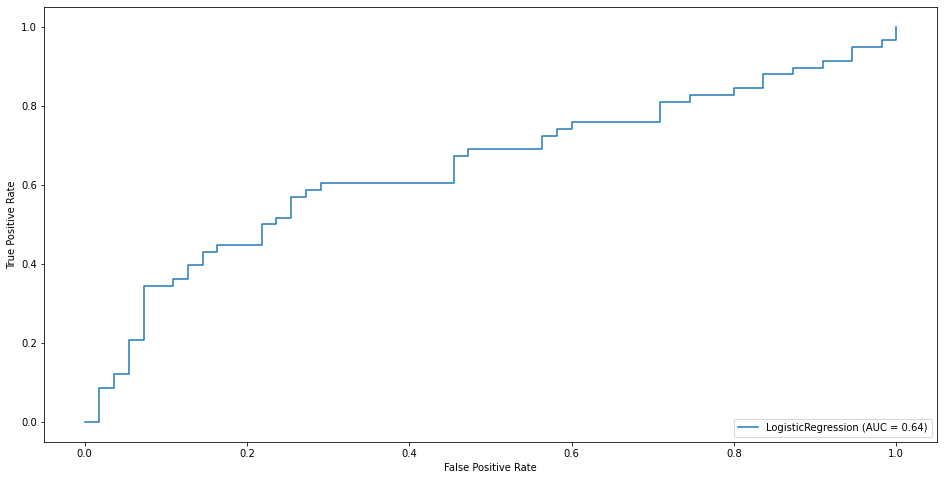

In [146]:
metrics.plot_roc_curve(classifier, xtest, ytest)  
plt.show()  

In [147]:
x,y = df[['Var1','Var2','Var3']],df['Target']

In [153]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y,test_size = 0.25, random_state=0)

In [154]:
clf = svm.SVC(random_state=0)

In [155]:
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

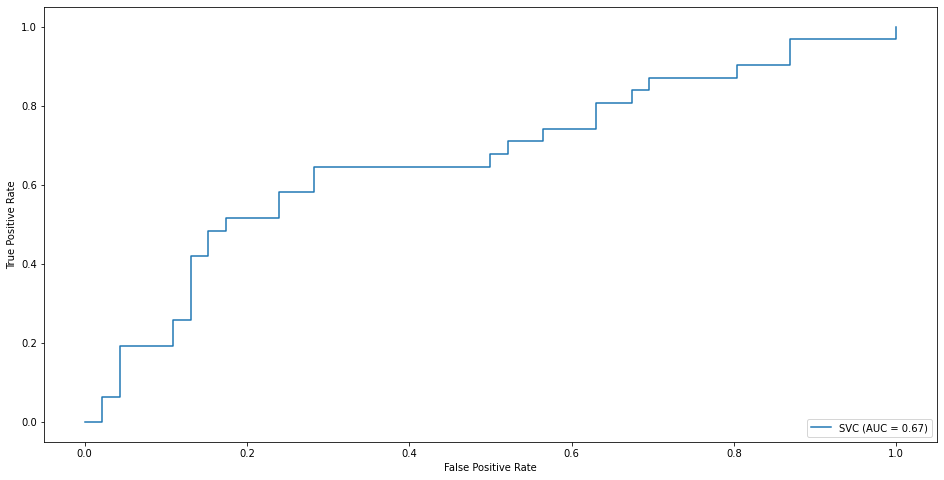

In [156]:
metrics.plot_roc_curve(clf, X_test, y_test)  
plt.show()         

In [157]:
from imblearn.over_sampling import BorderlineSMOTE
oversample = BorderlineSMOTE()
x, y = oversample.fit_resample(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

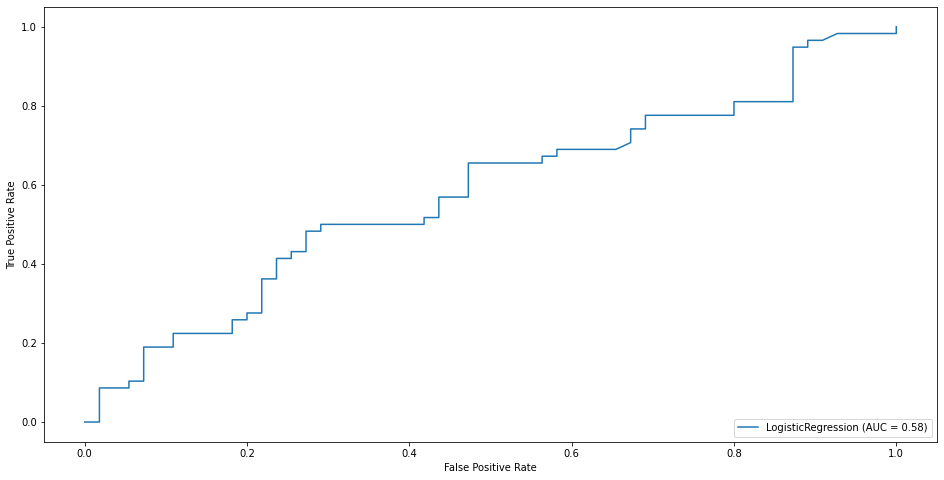

In [161]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
        x, y, test_size = 0.25, random_state = 0)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)
metrics.plot_roc_curve(classifier, xtest, ytest)  
plt.show()  